In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [2]:
df = pd.read_csv('LuvFlakkedCheeks_team_data.csv')

Text(0.5, 1.0, 'Correlation Heatmap')

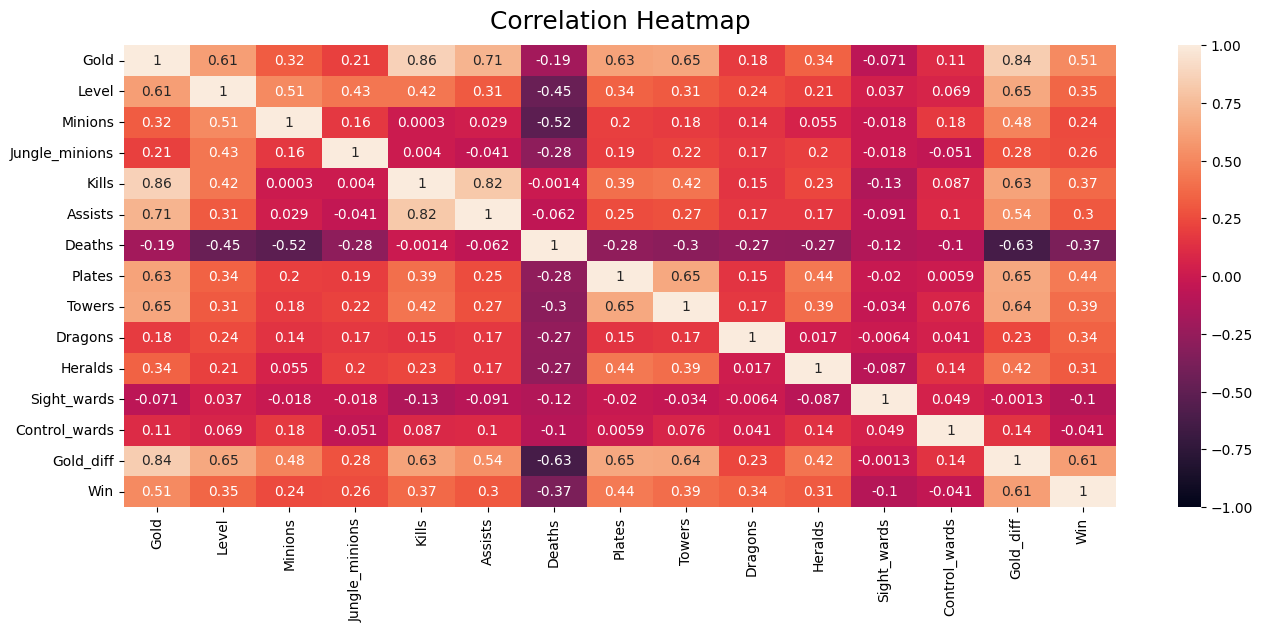

In [3]:
#Generate correlation matrix in orther to see most important values
corr = df.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

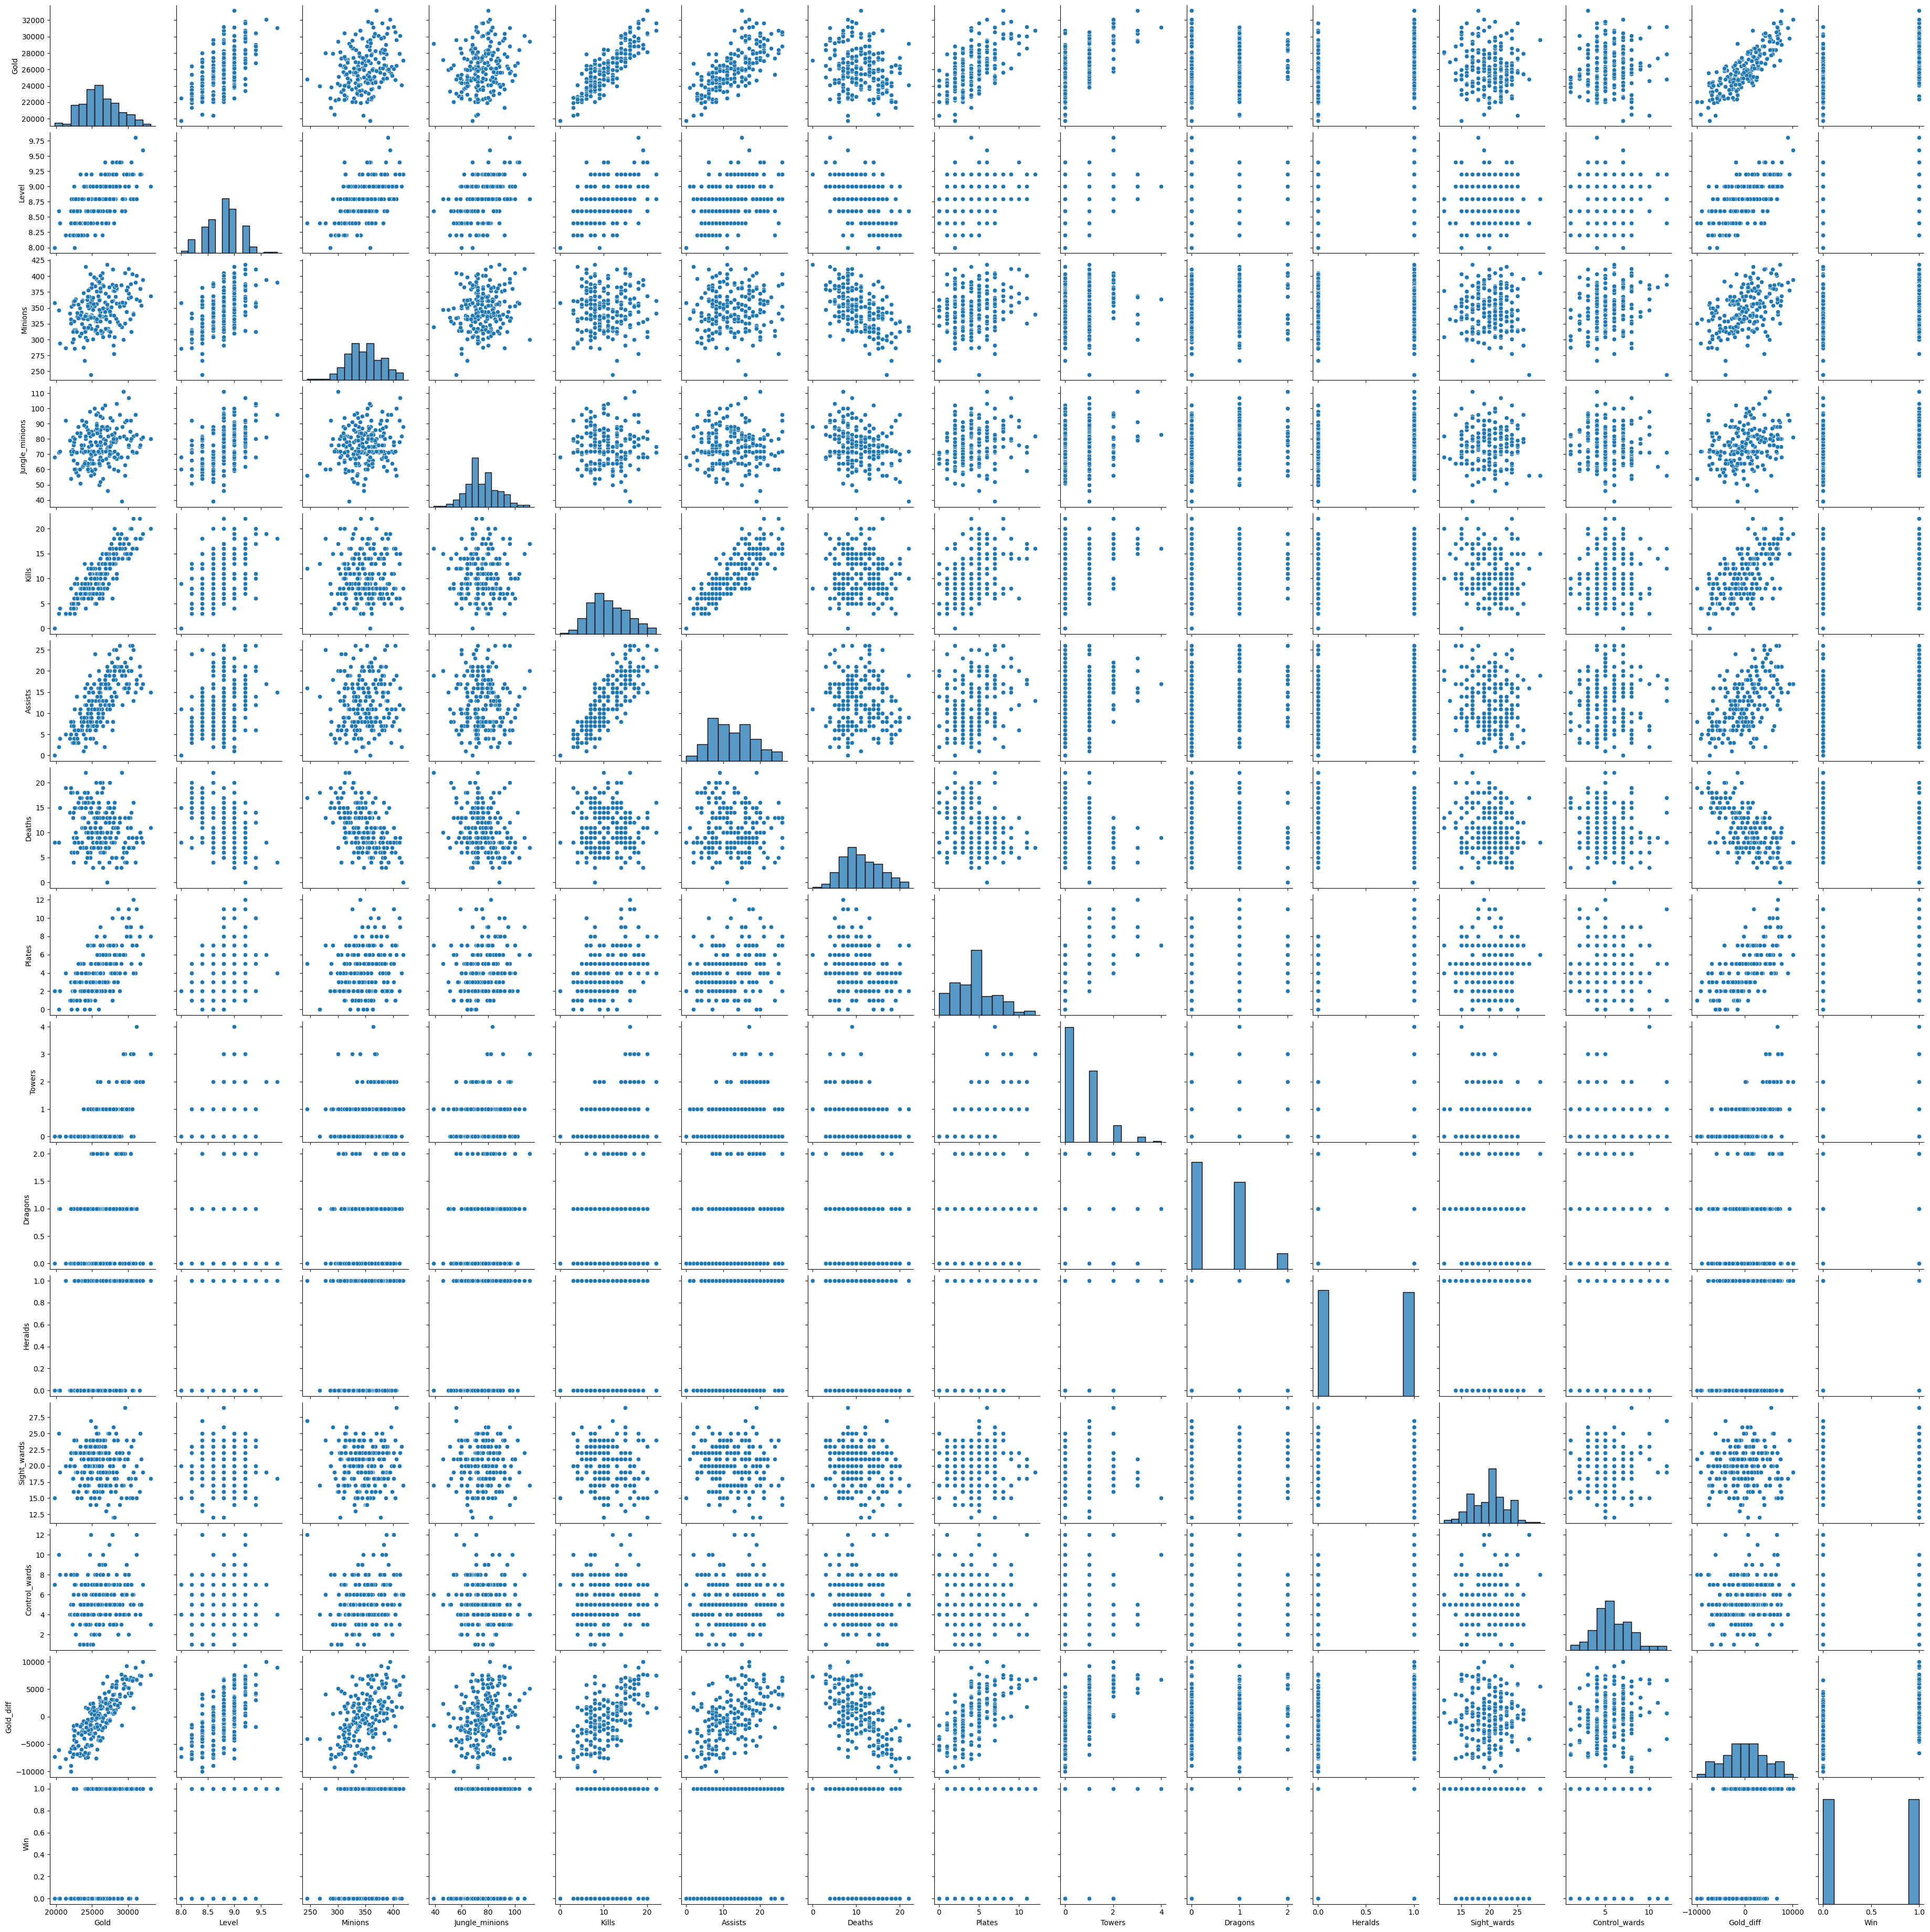

In [4]:
sns.pairplot(df)
plt.show()

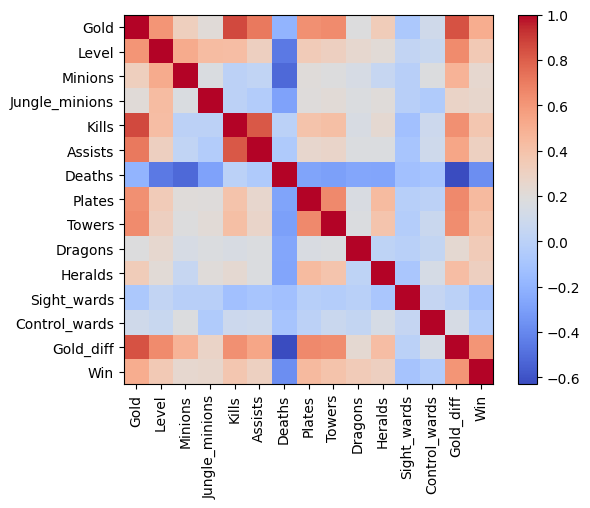

In [5]:
corr_matrix = df.corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

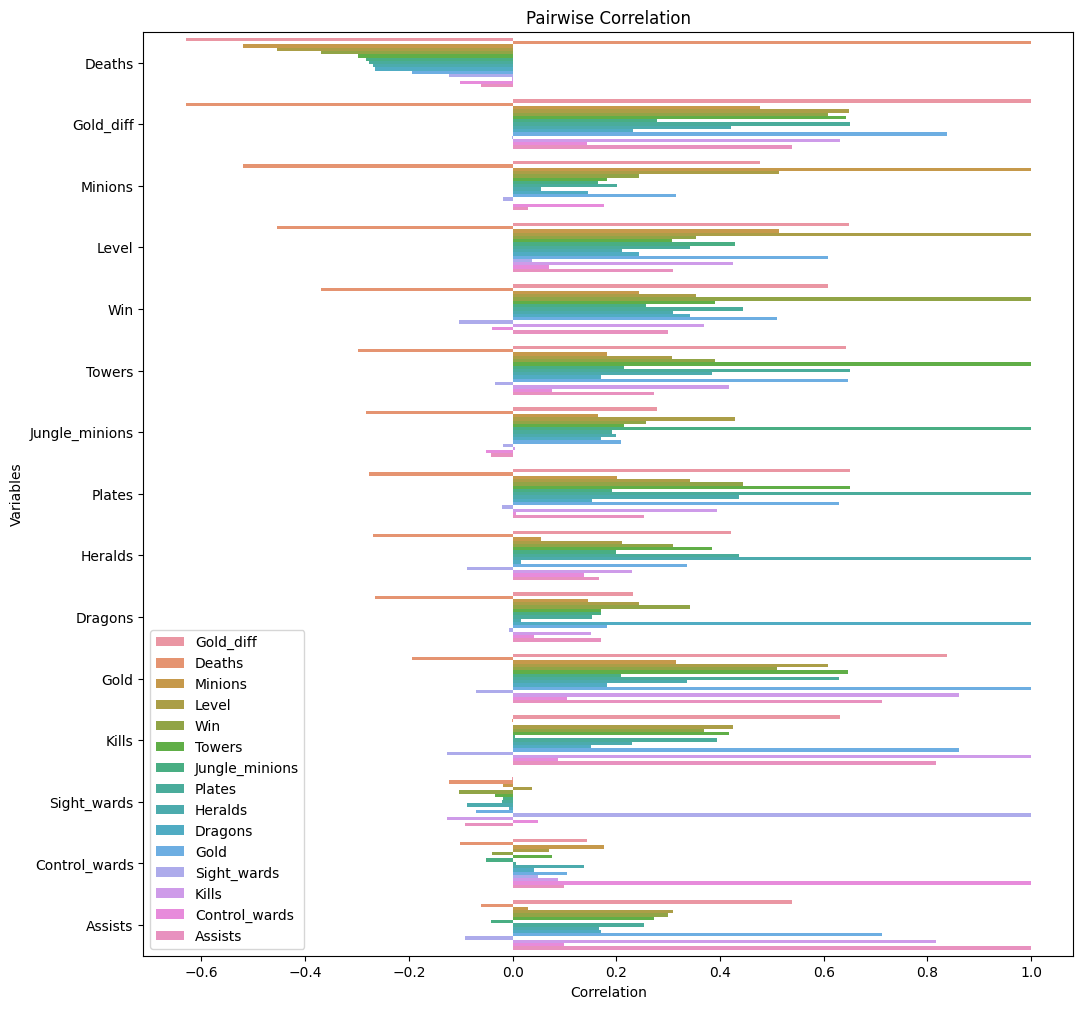

In [6]:
plt.figure(figsize=(12, 12))
sns.barplot(data=df.corr().unstack().sort_values().reset_index(), x=0, y='level_0', hue='level_1', orient='h')
plt.xlabel('Correlation')
plt.ylabel('Variables')
plt.title('Pairwise Correlation')
plt.legend()
plt.show()

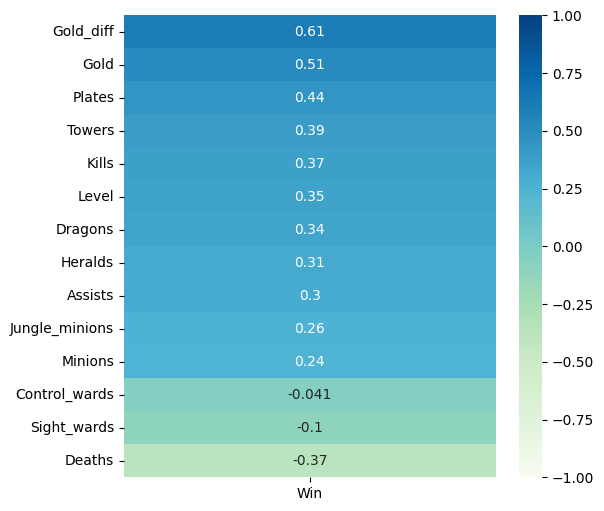

In [7]:
#Generate correlation matrix only of win column
fig, ax = plt.subplots(figsize=((6, 6)))
sns.heatmap(corr["Win"].sort_values(ascending=False).drop("Win").to_frame(), vmin=-1, vmax=1, annot=True,cmap="GnBu")
plt.show()

In [108]:
def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, figsize=(10,5), params=False):
    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)

    # Classification Report / Scores
    print("****CLASSIFICATION REPORT - TRAINING DATA****")
    print(classification_report(y_train, y_hat_train, digits=digits))

    print("****CLASSIFICATION REPORT - TEST DATA****")
    print(classification_report(y_test, y_hat_test, digits=digits))

    print("****CONFUSION MATRIX****")
    fig, axes = plt.subplots(ncols=1, figsize=figsize)

    # Confusion Matrix
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true', cmap='Purples', ax=axes)
    disp.ax_.set_title('Confusion Matrix')

    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)

def fit_eval(model, X_train, y_train, X_test, y_test, digits=4, figsize=(10,5), params=False):
    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits, figsize=figsize, params=params)

    return model


In [110]:
#We will first set the complete DataFrames
x_keep_original = ['Gold', 'Level', 'Minions', 'Jungle_minions', 'Kills', 'Assists', 'Deaths', 'Plates', 'Towers', 'Dragons', 'Heralds', 'Sight_wards', 'Control_wards', 'Gold_diff']
X_original = df[x_keep_original]
y_original = df["Win"]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.333333, random_state=42)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.5385    0.2222    0.3146        63
           1     0.5421    0.8286    0.6554        70

    accuracy                         0.5414       133
   macro avg     0.5403    0.5254    0.4850       133
weighted avg     0.5404    0.5414    0.4940       133

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     1.0000    0.0811    0.1500        37
           1     0.4688    1.0000    0.6383        30

    accuracy                         0.4925        67
   macro avg     0.7344    0.5405    0.3941        67
weighted avg     0.7621    0.4925    0.3686        67

****CONFUSION MATRIX****


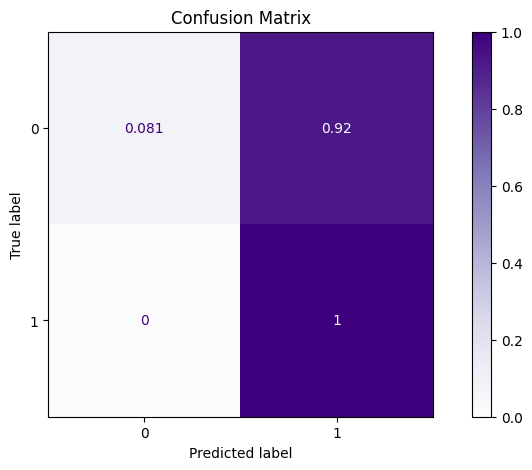

In [100]:
#Logistic regression using the original df
log_select = fit_eval(LogisticRegression(max_iter=1000), X_train, y_train, X_test, y_test)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        45
           1     1.0000    1.0000    1.0000        55

    accuracy                         1.0000       100
   macro avg     1.0000    1.0000    1.0000       100
weighted avg     1.0000    1.0000    1.0000       100

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7547    0.7273    0.7407        55
           1     0.6809    0.7111    0.6957        45

    accuracy                         0.7200       100
   macro avg     0.7178    0.7192    0.7182       100
weighted avg     0.7215    0.7200    0.7205       100

****CONFUSION MATRIX****


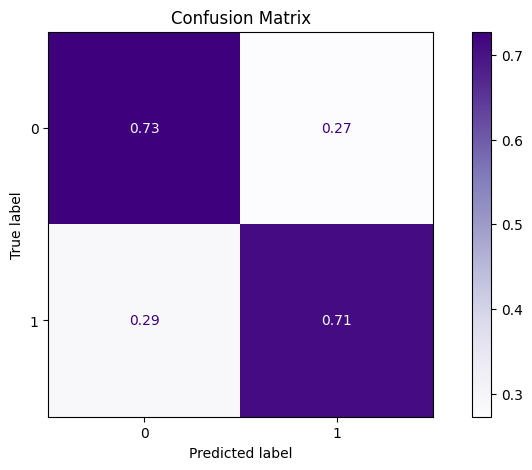

In [85]:
#Decision Tree using the original df
log_select = fit_eval(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.6512    0.4444    0.5283        63
           1     0.6111    0.7857    0.6875        70

    accuracy                         0.6241       133
   macro avg     0.6311    0.6151    0.6079       133
weighted avg     0.6301    0.6241    0.6121       133

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.5882    0.2703    0.3704        37
           1     0.4600    0.7667    0.5750        30

    accuracy                         0.4925        67
   macro avg     0.5241    0.5185    0.4727        67
weighted avg     0.5308    0.4925    0.4620        67

****CONFUSION MATRIX****


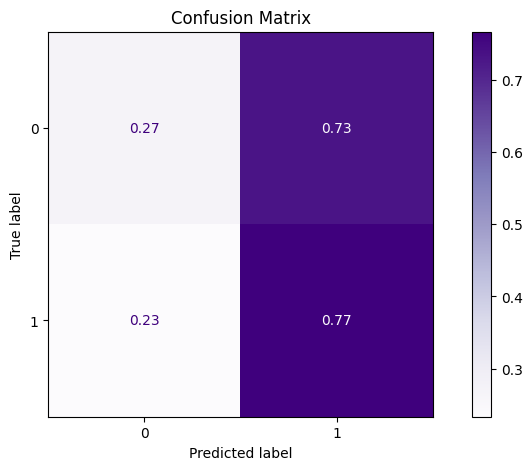

In [104]:
#Random Forest using the original df
log_select = fit_eval(RandomForestClassifier(), X_train, y_train, X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.6562    0.5676    0.6087        37
           1     0.5429    0.6333    0.5846        30

    accuracy                         0.5970        67
   macro avg     0.5996    0.6005    0.5967        67
weighted avg     0.6055    0.5970    0.5979        67



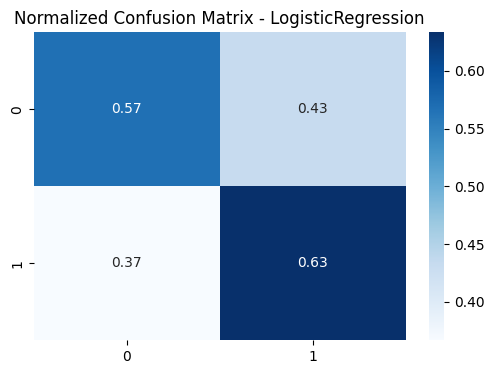

Classification Report:
              precision    recall  f1-score   support

           0     0.4545    0.4054    0.4286        37
           1     0.3529    0.4000    0.3750        30

    accuracy                         0.4030        67
   macro avg     0.4037    0.4027    0.4018        67
weighted avg     0.4091    0.4030    0.4046        67



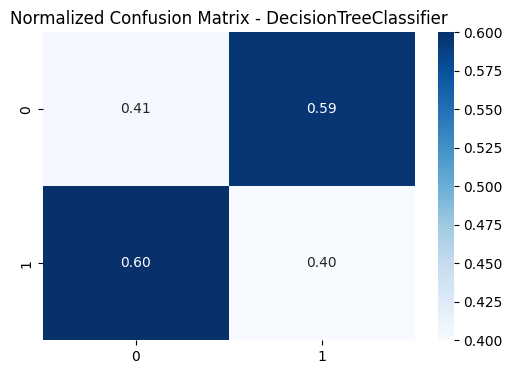

Classification Report:
              precision    recall  f1-score   support

           0    0.50000   0.35135   0.41270        37
           1    0.41463   0.56667   0.47887        30

    accuracy                        0.44776        67
   macro avg    0.45732   0.45901   0.44579        67
weighted avg    0.46178   0.44776   0.44233        67



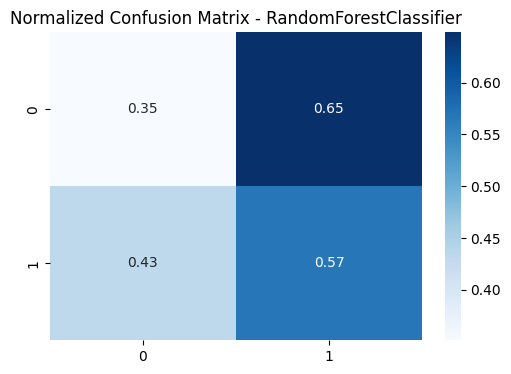

Classification Report:
              precision    recall  f1-score   support

           0    0.58140   0.67568   0.62500        37
           1    0.50000   0.40000   0.44444        30

    accuracy                        0.55224        67
   macro avg    0.54070   0.53784   0.53472        67
weighted avg    0.54495   0.55224   0.54415        67



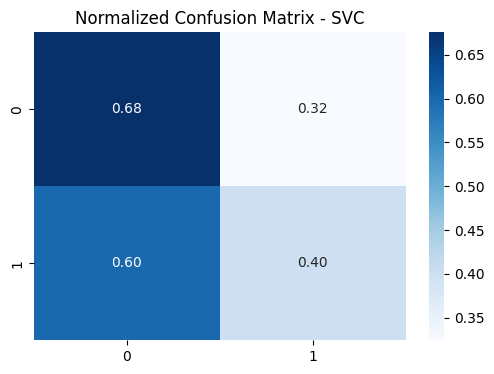

Classification Report:
              precision    recall  f1-score   support

           0    0.50000   0.35135   0.41270        37
           1    0.41463   0.56667   0.47887        30

    accuracy                        0.44776        67
   macro avg    0.45732   0.45901   0.44579        67
weighted avg    0.46178   0.44776   0.44233        67



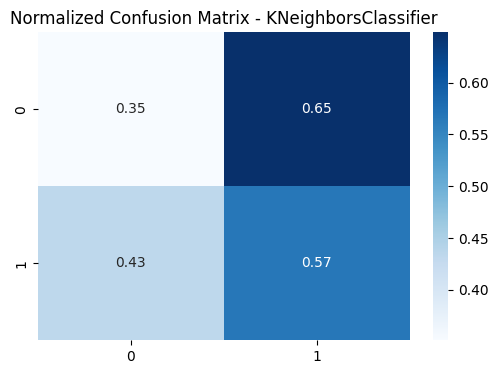

Classification Report:
              precision    recall  f1-score   support

           0    0.55224   1.00000   0.71154        37
           1    0.00000   0.00000   0.00000        30

    accuracy                        0.55224        67
   macro avg    0.27612   0.50000   0.35577        67
weighted avg    0.30497   0.55224   0.39294        67



C:\Users\zabit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zabit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zabit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

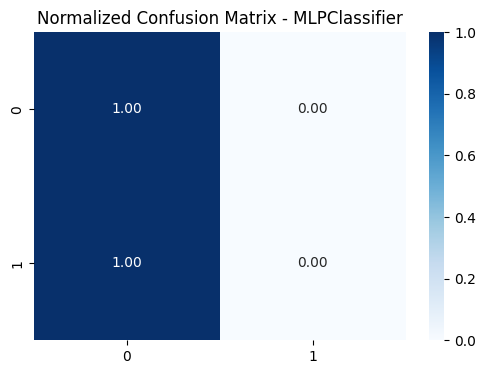

Classification Report:
              precision    recall  f1-score   support

           0    0.65625   0.56757   0.60870        37
           1    0.54286   0.63333   0.58462        30

    accuracy                        0.59701        67
   macro avg    0.59955   0.60045   0.59666        67
weighted avg    0.60548   0.59701   0.59791        67



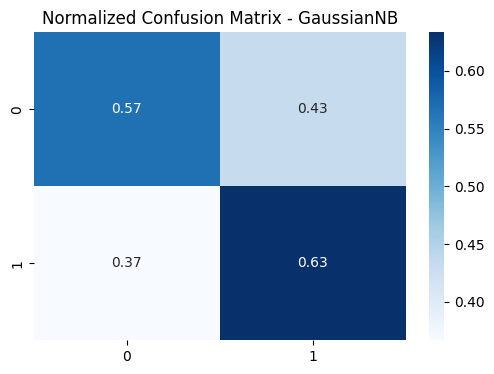

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

def evaluate_model(model, X_train, y_train, X_test, y_test, digits=5):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Compute classification report
    report = classification_report(y_test, predictions, digits=digits)

    # Print formatted classification report
    print(f"Classification Report:\n{report}")

    # Compute confusion matrix
    confusion_matrix_data = confusion_matrix(y_test, predictions)

    # Normalize confusion matrix
    normalized_confusion_matrix = confusion_matrix_data.astype('float') / confusion_matrix_data.sum(axis=1)[:, np.newaxis]

    # Plot normalized confusion matrix as heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(normalized_confusion_matrix, annot=True, cmap='Blues', fmt='.2f')
    plt.title(f"Normalized Confusion Matrix - {type(model).__name__}")
    plt.show()

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
evaluate_model(logistic_model, X_train, y_train, X_test, y_test, digits=4)

# Decision Tree
decision_tree_model = DecisionTreeClassifier()
evaluate_model(decision_tree_model, X_train, y_train, X_test, y_test, digits=4)

# Random Forest
random_forest_model = RandomForestClassifier()
evaluate_model(random_forest_model, X_train, y_train, X_test, y_test)

# Support Vector Machines (SVM)
svm_model = SVC()
evaluate_model(svm_model, X_train, y_train, X_test, y_test)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, y_train, X_test, y_test)

# Neural Networks
neural_network_model = MLPClassifier()
evaluate_model(neural_network_model, X_train, y_train, X_test, y_test)

# Naive Bayes
naive_bayes_model = GaussianNB()
evaluate_model(naive_bayes_model, X_train, y_train, X_test, y_test)